In [21]:
import os
import cv2
import pandas as pd
import numpy as np

In [2]:
folder_=os.listdir(r'C:\Users\pc\Downloads\notes\data_CNN\data\class_10_train')

In [3]:
folder_

['n01882714',
 'n02165456',
 'n02509815',
 'n03662601',
 'n04146614',
 'n04285008',
 'n07720875',
 'n07747607',
 'n07873807',
 'n07920052']

In [4]:
d1=pd.read_json(r'C:\Users\pc\Downloads\notes\data_CNN\data\class_dict_10.json')

In [5]:
d1

,n03662601,n02165456,n07873807,n07720875,n04146614,n01882714,n07920052,n02509815,n07747607,n04285008
class,lifeboat,"ladybug, ladybeetle, lady beetle, ladybird, la...","pizza, pizza pie",bell pepper,school bus,"koala, koala bear, kangaroo bear, native bear,...",espresso,"lesser panda, red panda, panda, bear cat, cat ...",orange,"sports car, sport car"
index,0,1,2,3,4,5,6,7,8,9


In [53]:
d1.loc['class','n03662601']

'lifeboat'

In [ ]:
image_set=[]
class_label=[]
for fn in folder_:
    for fn_ in os.listdir(r'C:\Users\pc\Downloads\notes\data_CNN\data\class_10_train\{}\images'.format(fn)):
        image_set.append(cv2.resize(cv2.imread(r'C:\Users\Reddy\Downloads\data\data\class_10_train\{}\images\{}'.format(fn,fn_)),(32,32)))
        class_label.append(d1.loc['class',fn])

In [56]:
len(image_set)

0

In [15]:
len(class_label)

5000

In [16]:
final_dataset=np.array(image_set)

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
final_cls_label=le.fit_transform(class_label)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(final_dataset,final_cls_label,stratify=final_cls_label,test_size=0.2)

In [20]:
print(final_dataset.shape)
print(final_cls_label.shape)

(0,)
(5000,)


In [21]:
print(type(final_dataset), len(final_dataset))
print(type(final_cls_label), len(final_cls_label))

<class 'numpy.ndarray'> 0
<class 'numpy.ndarray'> 5000


In [ ]:
X_train.shape

In [ ]:
from keras.models import Sequential
from keras.layers import InputLayer, Dense,Flatten
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,MaxPooling2D

In [53]:
model=Sequential()
model.add(InputLayer(input_shape=(64,64,3)))

model.add(Conv2D(32,kernel_size=(3,3),strides=(1,1),activation='relu',padding='valid'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1),padding='valid'))

model.add(Conv2D(16,kernel_size=(3,3),strides=(1,1),activation='relu',padding='valid'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1),padding='valid'))

model.add(Conv2D(16,kernel_size=(3,3),strides=(1,1),activation='relu',padding='valid'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1),padding='valid'))



model.add(Flatten())
model.add(Dense(30,activation='tanh'))
model.add(Dense(20,activation='tanh'))
model.add(Dense(10,activation='softmax'))


C:\Users\Reddy\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [57]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [61]:
model.fit(X_train,y_train,batch_size=32,epochs=30,validation_split=0.2)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 148ms/step - accuracy: 0.1037 - loss: 2.3077 - val_accuracy: 0.1100 - val_loss: 2.3073
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 145ms/step - accuracy: 0.0946 - loss: 2.3058 - val_accuracy: 0.0962 - val_loss: 2.3111
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 146ms/step - accuracy: 0.1025 - loss: 2.3076 - val_accuracy: 0.1100 - val_loss: 2.3095
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 142ms/step - accuracy: 0.0897 - loss: 2.3111 - val_accuracy: 0.1025 - val_loss: 2.3066
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 138ms/step - accuracy: 0.1071 - loss: 2.3063 - val_accuracy: 0.0913 - val_loss: 2.3083
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 139ms/step - accuracy: 0.1086 - loss: 2.3061 - val_accuracy: 0.1100 - val_loss: 2.3024
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 140ms/step - accuracy: 0.0964 - loss: 2.3068 - val_accuracy: 0.0913 - val_loss: 2.3079
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 139ms/step - accuracy: 0.0901 - loss: 2

In [23]:
le = LabelEncoder()

In [ ]:
dg = ImageDataGenerator()

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [36]:
img=cv2.imread(r"C:\Users\pc\Downloads\notes\data_CNN\data\class_10_val\val_images\val_47.jpeg")

In [37]:
dg = ImageDataGenerator(rotation_range=90)

In [38]:
img.shape

(64, 64, 3)

In [39]:
img = img.reshape((1,64,64,3))

In [40]:
i = 0
for y in dg.flow(img, batch_size=1,save_to_dir=r"C:\Users\pc\Downloads\images",save_format="jpg"):
    if i==10:
        break
    i+=1

In [41]:
dg = ImageDataGenerator(width_shift_range=0.6,fill_mode="wrap")

In [42]:
dg = ImageDataGenerator(brightness_range=None)

In [6]:
import keras

In [7]:
from keras.datasets import mnist

In [8]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 6s 1us/step


In [9]:
x_train.shape

(60000, 28, 28)

In [11]:
print(x_train.shape,y_train.shape)

(60000, 28, 28) (60000,)


In [12]:
print(x_test.shape,y_test.shape)

(10000, 28, 28) (10000,)


In [13]:
x_train.shape

(60000, 28, 28)

In [14]:
x_train[0].shape

(28, 28)

In [15]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

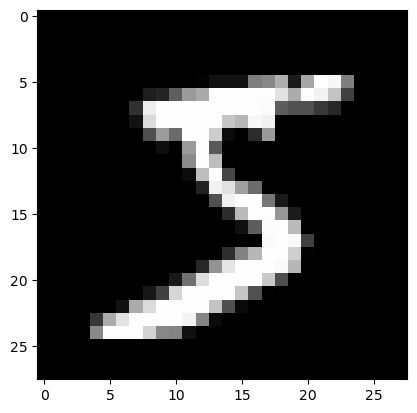

In [17]:
plt.imshow(x_train[0],cmap='gray')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

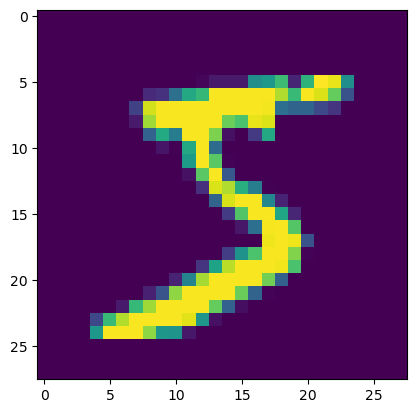

In [18]:
plt.imshow(x_train[0])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

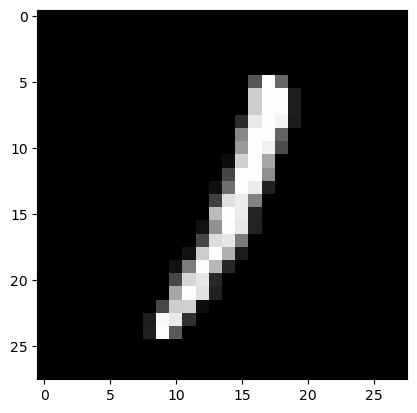

In [20]:
plt.imshow(x_train[99],cmap='gray')
plt.show

In [ ]:
train_gen = ImageDataGenerator(rescale=1./255,rotation_range=45,width_shift_range=0.8,height_shift_range=0.5,
                              brightness_Range=(0,1))

In [25]:
test_gen = ImageDataGenerator()

In [27]:
cv_gen = ImageDataGenerator()

In [ ]:
for fo in ["Train","Test","Validation"]:
    for label in np.unique(y_train):
        os.makedirs(r")

In [ ]:
cv2.imwrite